In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.simplefilter(action="ignore")

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

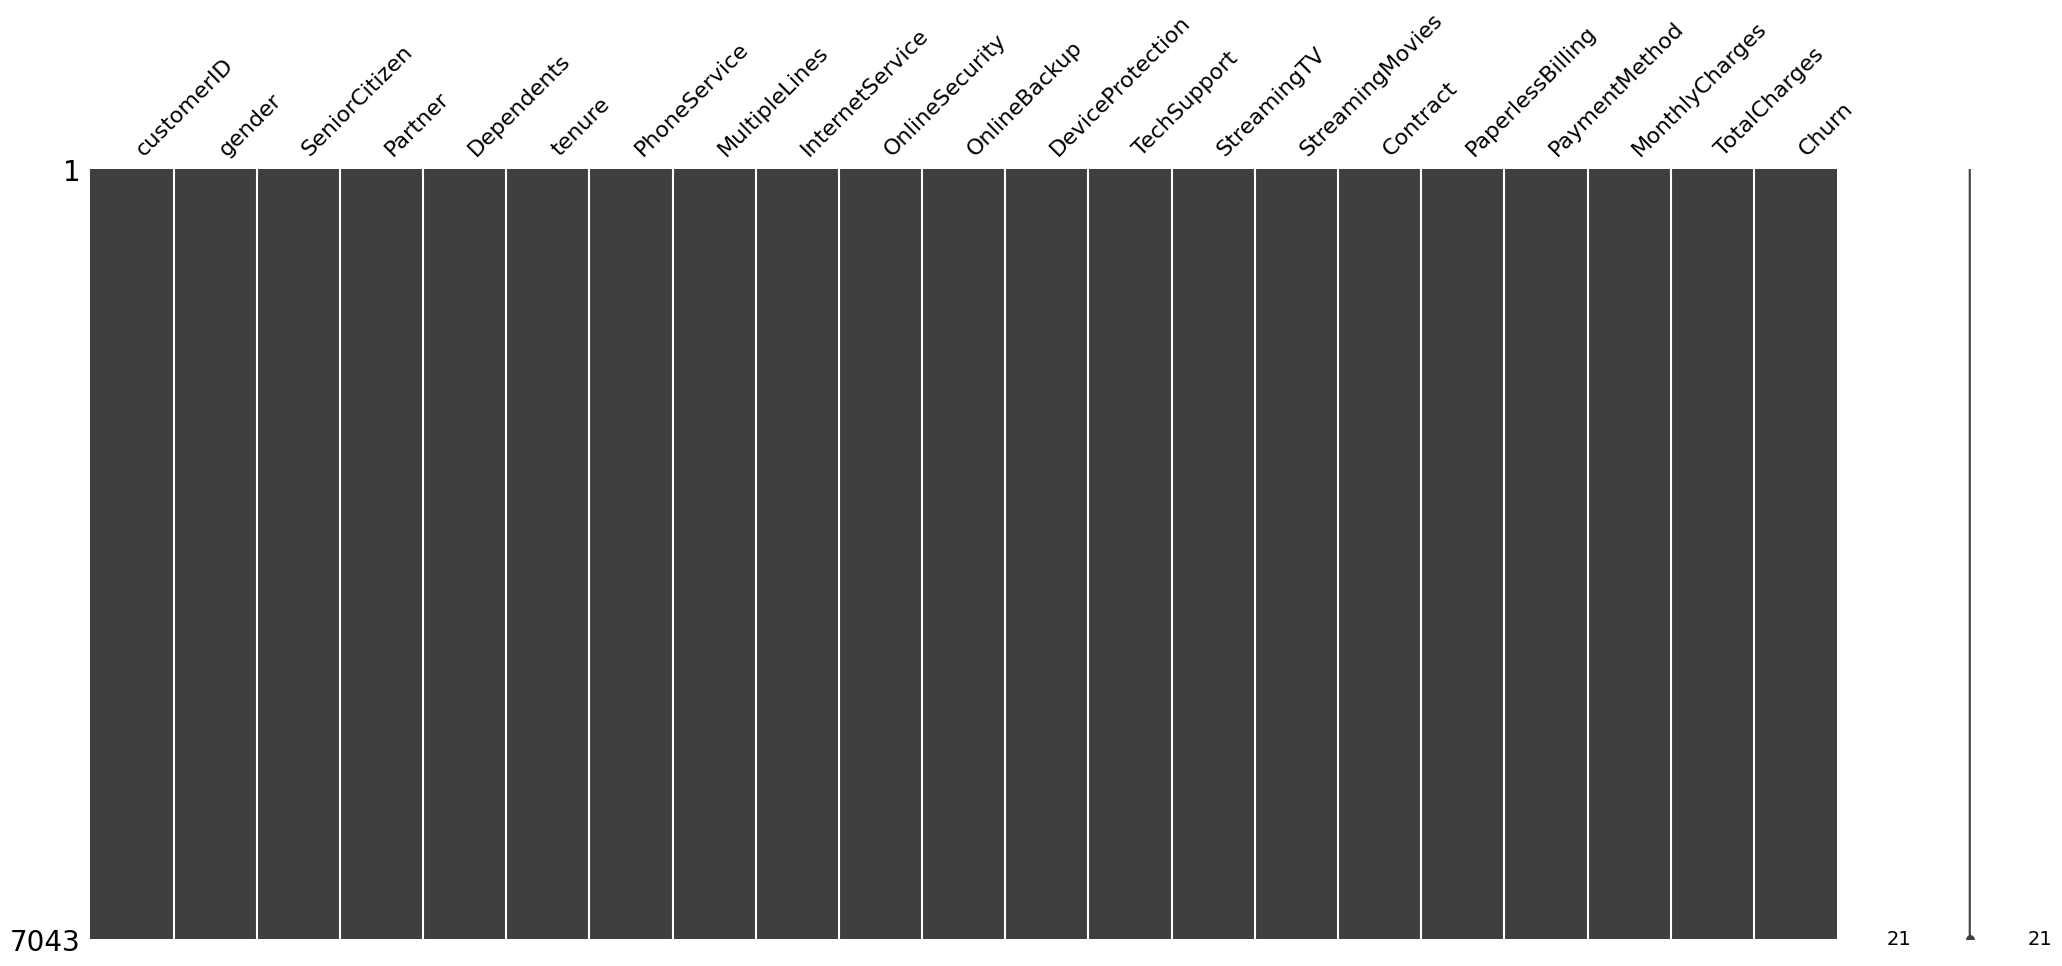

In [3]:
msno.matrix(df)

Data Preprocessing

In [4]:
#Converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
# null observations present in the TotalCharges column
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
#Identifying Index of customers who have tenure as 0
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [7]:
#Dropping those index
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [8]:
# In the above code we have dropped all the rows. with tenure 0 months and processing data with missing values in Tenure Charge with Mean
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

Data Transformation

In [11]:
#Label Encoding to Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

In [12]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines','gender', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df, columns = one_hot_encoding_columns)

In [13]:
# Feature engineering example: Ratio of MonthlyCharges to TotalCharges
df_transformed['MonthlyToTotalChargesRatio'] = df_transformed['MonthlyCharges'] / df_transformed['TotalCharges']

#Ratio of Tenure to Monthly Charges
df_transformed['TenureTimesMonthlyCharges'] = df_transformed['tenure'] * df['MonthlyCharges']

#Identify Whether the customer has any internet service
df_transformed['HasInternetService'] = df_transformed['InternetService_DSL'] | df_transformed['InternetService_Fiber optic']

In [14]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [15]:
df_transformed.shape

(7032, 46)

In [16]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print("Yes = the customer left the company this quarter. No = the customer remained with the company. ")
print("1 = the customer left the company this quarter. 0 = the customer remained with the company. ")

No     5163
Yes    1869
Name: Churn, dtype: int64
Yes = the customer left the company this quarter. No = the customer remained with the company. 
1 = the customer left the company this quarter. 0 = the customer remained with the company. 


In [17]:
churn_ratio = churn_counts[1] / churn_counts[0]
print(churn_ratio)

0.36199883788495063


In [18]:
#Handling Imbalance Dataset
# Undersampling using imbalanced-learn library
X = df_transformed.drop(columns='Churn')
y = df_transformed.loc[:, 'Churn']
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [19]:
#Spliting the data in 70:10:20 ratio for training, validation and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

# Splitting the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_val = pd.get_dummies(X_val)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


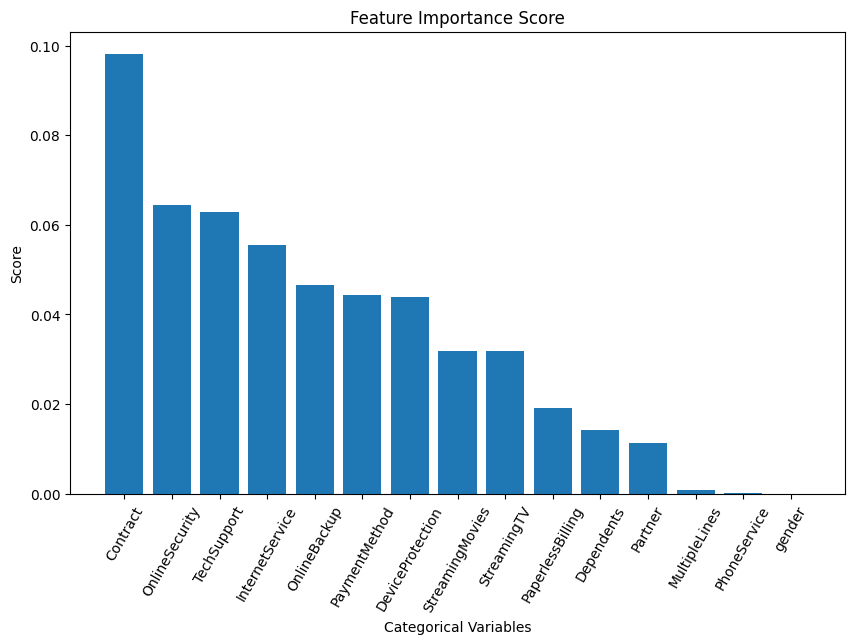

In [20]:
#Calculating Feature Score 
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.xlabel('Categorical Variables')
plt.ylabel('Score')
plt.title('Feature Importance Score')
plt.show()

Models

In [21]:
#Random Foresting
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
print(" Accuracy:", accuracy)
print(" f1_score:", f1score)
print(classification_report(y_test,y_pred))

 Accuracy: 0.7513368983957219
 f1_score: 0.7526595744680852
              precision    recall  f1-score   support

          No       0.76      0.74      0.75       379
         Yes       0.74      0.77      0.75       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



In [22]:
#Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_val_pred = gradient_boosting.predict(X_val)

In [23]:
y_pred = gradient_boosting.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix - Gradient Boosting:")
print(cm_gb)

Confusion Matrix - Gradient Boosting:
[[272 107]
 [ 76 293]]


In [24]:
y_pred = gradient_boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
print(" Accuracy:", accuracy)
print(" f1_score:", f1score)
print(classification_report(y_test,y_pred))

 Accuracy: 0.7553475935828877
 f1_score: 0.7620286085825748
              precision    recall  f1-score   support

          No       0.78      0.72      0.75       379
         Yes       0.73      0.79      0.76       369

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [25]:
#Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_val_pred = logistic_regression.predict(X_val)

In [26]:
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
print(" Accuracy:", accuracy)
print(" f1_score:", f1score)
print(classification_report(y_test,y_pred))

 Accuracy: 0.766042780748663
 f1_score: 0.7712418300653595
              precision    recall  f1-score   support

          No       0.79      0.73      0.76       379
         Yes       0.74      0.80      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



In [27]:
#SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1score = f1_score(y_val, y_val_pred, pos_label='Yes')

In [28]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
print(" Accuracy:", accuracy)
print(" f1_score:", f1score)
print(classification_report(y_test,y_pred))

 Accuracy: 0.6336898395721925
 f1_score: 0.5835866261398176
              precision    recall  f1-score   support

          No       0.61      0.74      0.67       379
         Yes       0.66      0.52      0.58       369

    accuracy                           0.63       748
   macro avg       0.64      0.63      0.63       748
weighted avg       0.64      0.63      0.63       748



In [29]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1score = f1_score(y_val, y_val_pred, pos_label='Yes')


In [30]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
print(" Accuracy:", accuracy)
print(" f1_score:", f1score)
print(classification_report(y_test,y_pred))
cm_gb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix - Gradient Boosting:")
print(cm_gb)

 Accuracy: 0.6363636363636364
 f1_score: 0.6324324324324324
              precision    recall  f1-score   support

          No       0.64      0.64      0.64       379
         Yes       0.63      0.63      0.63       369

    accuracy                           0.64       748
   macro avg       0.64      0.64      0.64       748
weighted avg       0.64      0.64      0.64       748

Confusion Matrix - Gradient Boosting:
[[242 137]
 [135 234]]


In [31]:
# Random Forest
y_pred_rf = random_forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

# Gradient Boosting
y_pred_gb = gradient_boosting.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix - Gradient Boosting:")
print(cm_gb)

# Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix - Logistic Regression:")
print(cm_lr)

# SVM
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix - SVM:")
print(cm_svm)

# KNN
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix - KNN:")
print(cm_knn)

Confusion Matrix - Random Forest:
[[279 100]
 [ 86 283]]
Confusion Matrix - Gradient Boosting:
[[272 107]
 [ 76 293]]
Confusion Matrix - Logistic Regression:
[[278 101]
 [ 74 295]]
Confusion Matrix - SVM:
[[282  97]
 [177 192]]
Confusion Matrix - KNN:
[[242 137]
 [135 234]]


In [ ]:
# Random Search
#Define the parameter grid for random search
param_grid = {
    'n_estimators': sp_randint(100, 1000),
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform random search using 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the performance of the best model
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1score = f1_score(y_val, y_val_pred, pos_label='Yes')
val_precision = precision_score(y_val, y_val_pred, pos_label='Yes')
val_recall = recall_score(y_val, y_val_pred, pos_label='Yes')
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
print("Accuracy of dataset:", accuracy)
print("F1 Score of dataset:", f1score)
print("Precision of dataset:", precision)
print("Recall of dataset:", recall)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix - Gradient Boosting:")
print(cm_gb)

In [ ]:

#Grid Search                                                                                                                                                                             from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 300, 500, 700, 900],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, pos_label='Yes')
print("Accuracy of dataset:", accuracy)
print("F1 Score of dataset:", f1_score)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix of Validation dataset:")
print(cm_gb)